In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
char = pd.read_csv('characters_tv.csv')
title = pd.read_csv('titles_tv.csv')

In [3]:
char.head()

,index,name,birthday,title,characterName,characterYear,characterAge,characterGender,loveInterest
0,0,Ben Platt,09/24/1993,The Politician,Payton Hobart,hs senior,NaN,M,"Alice Charles, Astrid Sloan, River Barkley\r"
1,1,Zoey Deutch,11/10/1994,The Politician,Infinity Jackson,hs senior,NaN,F,NaN
2,2,Lucy Boynton,01/17/1994,The Politician,Astrid Sloan,hs senior,NaN,F,"Payton Hobart, River Barkley\r"
3,3,Julia Schlaepfer,03/03/1995,The Politician,Alice Charles,hs senior,NaN,F,"Payton Hobart, James Sullivan\r"
4,4,Laura Dreyfuss,08/22/1988,The Politician,McAfee Westbrook,hs senior,NaN,F,Skye Leighton


In [4]:
title.head()

,index,title,releaseDate,fandom
0,0,The Politician,09/27/2019,https://thepolitician.fandom.com/wiki/The_Poli...
1,1,Gilmore Girls,10/05/2000,https://gilmoregirls.fandom.com/wiki/Gilmorepedia
2,2,Sex Education,01/11/2019,https://sexeducation.fandom.com/wiki/Sex_Educa...
3,3,Chilling Adventures of Sabrina,10/26/2018,https://riverdale.fandom.com/wiki/Chilling_Adv...
4,4,Everything Sucks!,02/16/2018,https://everythingsucks.fandom.com/wiki/Everyt...


### **About**
This is a manually collected dataset collected to gain a better understanding of the age differences between teen characters in TV shows and the actors who portray them.

### **Data Overview**

In [5]:
char.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            243 non-null    int64  
 1   name             243 non-null    object 
 2   birthday         227 non-null    object 
 3   title            243 non-null    object 
 4   characterName    243 non-null    object 
 5   characterYear    111 non-null    object 
 6   characterAge     131 non-null    float64
 7   characterGender  243 non-null    object 
 8   loveInterest     132 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 17.2+ KB


In [6]:
char.isnull().sum()

index                0
name                 0
birthday            16
title                0
characterName        0
characterYear      132
characterAge       112
characterGender      0
loveInterest       111
dtype: int64

We can see that there are some null values in the characterYear and characterAge columns. To fix this, we can use the calculation which determines approximate character age below:
- college freshman = 18 years old
- hs senior = 17
- hs junior = 16
- hs sophomore = 15
- hs freshman = 14
- 5th Year = 17
- 7th grade = 12
- 6th grade = 11

In [7]:
char[char['characterYear'].isnull() & char['characterAge'].isnull()]

,index,name,birthday,title,characterName,characterYear,characterAge,characterGender,loveInterest
92,92,Marlo Kelly,NaN,Dare Me,Beth Cassidy,NaN,NaN,F,Addy Hanlon
93,93,Herizen Guardiola,07/24/1996,Dare Me,Addy Hanlon,NaN,NaN,F,Beth Cassidy


We have two rows with NaN values in both characterYear and characterAge. So we should these rows.

In [8]:
char = char.drop([92,93])

In [9]:
char

,index,name,birthday,title,characterName,characterYear,characterAge,characterGender,loveInterest
0,0,Ben Platt,09/24/1993,The Politician,Payton Hobart,hs senior,NaN,M,"Alice Charles, Astrid Sloan, River Barkley\r"
1,1,Zoey Deutch,11/10/1994,The Politician,Infinity Jackson,hs senior,NaN,F,NaN
2,2,Lucy Boynton,01/17/1994,The Politician,Astrid Sloan,hs senior,NaN,F,"Payton Hobart, River Barkley\r"
3,3,Julia Schlaepfer,03/03/1995,The Politician,Alice Charles,hs senior,NaN,F,"Payton Hobart, James Sullivan\r"
4,4,Laura Dreyfuss,08/22/1988,The Politician,McAfee Westbrook,hs senior,NaN,F,Skye Leighton
...,...,...,...,...,...,...,...,...,...
238,238,Thomas Mitchell Barnet,NaN,Locke & Key,Sam Lesser,hs junior,NaN,M,NaN
239,239,Kevin Alves,10/19/1991,Locke & Key,Javi,hs junior,NaN,M,NaN
240,240,Asha Bromfield,11/09/1994,Locke & Key,Zadie Wells,hs junior,NaN,F,NaN
241,241,Felix Mallard,04/20/1998,Locke & Key,Lucas Caravaggio,NaN,17.0,M,NaN


In [10]:
char.isnull().sum()

index                0
name                 0
birthday            15
title                0
characterName        0
characterYear      130
characterAge       110
characterGender      0
loveInterest       111
dtype: int64

We can see that there is 1 row that has value in both characterYear and characterAge.

In [11]:
char[char['characterYear'].notna() & char['characterAge'].notna()]

,index,name,birthday,title,characterName,characterYear,characterAge,characterGender,loveInterest
131,131,Justin Prentice,03/25/1994,13 Reasons Why,Bryce Walker,hs senior,18.0,M,NaN


This is a bit different from our calculation above, because our calculation is approximate.

In [12]:
char['characterYear'].unique()

array(['hs senior', 'hs sophomore', nan, 'hs junior', 'hs freshman',
       '7th grade', '6th grade', 'college freshman', '5th Year'],
      dtype=object)

In [13]:
char.loc[(char["characterYear"] == 'college freshman'),"characterAge"] = 18
char.loc[(char["characterYear"] == 'hs senior'),"characterAge"] = 17
char.loc[(char["characterYear"] == 'hs junior'),"characterAge"] = 16
char.loc[(char["characterYear"] == 'hs sophomore'),"characterAge"] = 15
char.loc[(char["characterYear"] == 'hs freshman'),"characterAge"] = 14
char.loc[(char["characterYear"] == '5th Year'),"characterAge"] = 17
char.loc[(char["characterYear"] == '7th grade'),"characterAge"] = 12
char.loc[(char["characterYear"] == '6th grade'),"characterAge"] = 11


In [14]:
char.isnull().sum()

index                0
name                 0
birthday            15
title                0
characterName        0
characterYear      130
characterAge         0
characterGender      0
loveInterest       111
dtype: int64

In [15]:
char = char.drop('characterYear',axis=1)

In [16]:
char

,index,name,birthday,title,characterName,characterAge,characterGender,loveInterest
0,0,Ben Platt,09/24/1993,The Politician,Payton Hobart,17.0,M,"Alice Charles, Astrid Sloan, River Barkley\r"
1,1,Zoey Deutch,11/10/1994,The Politician,Infinity Jackson,17.0,F,NaN
2,2,Lucy Boynton,01/17/1994,The Politician,Astrid Sloan,17.0,F,"Payton Hobart, River Barkley\r"
3,3,Julia Schlaepfer,03/03/1995,The Politician,Alice Charles,17.0,F,"Payton Hobart, James Sullivan\r"
4,4,Laura Dreyfuss,08/22/1988,The Politician,McAfee Westbrook,17.0,F,Skye Leighton
...,...,...,...,...,...,...,...,...
238,238,Thomas Mitchell Barnet,NaN,Locke & Key,Sam Lesser,16.0,M,NaN
239,239,Kevin Alves,10/19/1991,Locke & Key,Javi,16.0,M,NaN
240,240,Asha Bromfield,11/09/1994,Locke & Key,Zadie Wells,16.0,F,NaN
241,241,Felix Mallard,04/20/1998,Locke & Key,Lucas Caravaggio,17.0,M,NaN


In [17]:
title.head()

,index,title,releaseDate,fandom
0,0,The Politician,09/27/2019,https://thepolitician.fandom.com/wiki/The_Poli...
1,1,Gilmore Girls,10/05/2000,https://gilmoregirls.fandom.com/wiki/Gilmorepedia
2,2,Sex Education,01/11/2019,https://sexeducation.fandom.com/wiki/Sex_Educa...
3,3,Chilling Adventures of Sabrina,10/26/2018,https://riverdale.fandom.com/wiki/Chilling_Adv...
4,4,Everything Sucks!,02/16/2018,https://everythingsucks.fandom.com/wiki/Everyt...


### **In this notebook, we are going to mainly study about the difference between character age and actor age, and the relationships of actor age. So we should remove rows which contain NaN in birthday column.**

In [18]:
char = char[char['birthday'].notna()]

In [19]:
char.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226 entries, 0 to 241
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            226 non-null    int64  
 1   name             226 non-null    object 
 2   birthday         226 non-null    object 
 3   title            226 non-null    object 
 4   characterName    226 non-null    object 
 5   characterAge     226 non-null    float64
 6   characterGender  226 non-null    object 
 7   loveInterest     124 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 15.9+ KB


In [20]:
char['loveInterest'] = char['loveInterest'].fillna('')

<ipython-input-20-6cf4468e305d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  char['loveInterest'] = char['loveInterest'].fillna('')


In [21]:
char.isnull().sum()

index              0
name               0
birthday           0
title              0
characterName      0
characterAge       0
characterGender    0
loveInterest       0
dtype: int64

In [22]:
char['characterGender'].unique()

array(['M', 'F', 'NB', 'TM'], dtype=object)

In [23]:
char['birthday'] = pd.to_datetime(char['birthday'])
char

<ipython-input-23-995013ab927c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  char['birthday'] = pd.to_datetime(char['birthday'])


,index,name,birthday,title,characterName,characterAge,characterGender,loveInterest
0,0,Ben Platt,1993-09-24,The Politician,Payton Hobart,17.0,M,"Alice Charles, Astrid Sloan, River Barkley\r"
1,1,Zoey Deutch,1994-11-10,The Politician,Infinity Jackson,17.0,F,
2,2,Lucy Boynton,1994-01-17,The Politician,Astrid Sloan,17.0,F,"Payton Hobart, River Barkley\r"
3,3,Julia Schlaepfer,1995-03-03,The Politician,Alice Charles,17.0,F,"Payton Hobart, James Sullivan\r"
4,4,Laura Dreyfuss,1988-08-22,The Politician,McAfee Westbrook,17.0,F,Skye Leighton
...,...,...,...,...,...,...,...,...
235,235,Griffin Gluck,2000-08-24,Locke & Key,Gabe,15.0,M,Kinsey Locke
236,236,Petrice Jones,1993-05-10,Locke & Key,Scot Cavendish,16.0,M,Kinsey Locke
239,239,Kevin Alves,1991-10-19,Locke & Key,Javi,16.0,M,
240,240,Asha Bromfield,1994-11-09,Locke & Key,Zadie Wells,16.0,F,


In [24]:
char.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226 entries, 0 to 241
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   index            226 non-null    int64         
 1   name             226 non-null    object        
 2   birthday         226 non-null    datetime64[ns]
 3   title            226 non-null    object        
 4   characterName    226 non-null    object        
 5   characterAge     226 non-null    float64       
 6   characterGender  226 non-null    object        
 7   loveInterest     226 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 15.9+ KB


In [25]:
char['age'] = (pd.datetime.today() - char['birthday']).dt.days*0.00273973
# You can subtract the birth date from today and divide the days by 365
# Or multiply by 0.00273973 base on Google

<ipython-input-25-92dd6049c290>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  char['age'] = (pd.datetime.today() - char['birthday']).dt.days*0.00273973
<ipython-input-25-92dd6049c290>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  char['age'] = (pd.datetime.today() - char['birthday']).dt.days*0.00273973


In [26]:
char.head()

,index,name,birthday,title,characterName,characterAge,characterGender,loveInterest,age
0,0,Ben Platt,1993-09-24,The Politician,Payton Hobart,17.0,M,"Alice Charles, Astrid Sloan, River Barkley\r",28.421959
1,1,Zoey Deutch,1994-11-10,The Politician,Infinity Jackson,17.0,F,,27.293190
2,2,Lucy Boynton,1994-01-17,The Politician,Astrid Sloan,17.0,F,"Payton Hobart, River Barkley\r",28.106890
3,3,Julia Schlaepfer,1995-03-03,The Politician,Alice Charles,17.0,F,"Payton Hobart, James Sullivan\r",26.983601
4,4,Laura Dreyfuss,1988-08-22,The Politician,McAfee Westbrook,17.0,F,Skye Leighton,33.515117


In [27]:
char.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226 entries, 0 to 241
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   index            226 non-null    int64         
 1   name             226 non-null    object        
 2   birthday         226 non-null    datetime64[ns]
 3   title            226 non-null    object        
 4   characterName    226 non-null    object        
 5   characterAge     226 non-null    float64       
 6   characterGender  226 non-null    object        
 7   loveInterest     226 non-null    object        
 8   age              226 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 17.7+ KB


In [28]:
char['age'] = char['age'].astype(int)

<ipython-input-28-8b66a5947d1f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  char['age'] = char['age'].astype(int)


In [29]:
char.head()

,index,name,birthday,title,characterName,characterAge,characterGender,loveInterest,age
0,0,Ben Platt,1993-09-24,The Politician,Payton Hobart,17.0,M,"Alice Charles, Astrid Sloan, River Barkley\r",28
1,1,Zoey Deutch,1994-11-10,The Politician,Infinity Jackson,17.0,F,,27
2,2,Lucy Boynton,1994-01-17,The Politician,Astrid Sloan,17.0,F,"Payton Hobart, River Barkley\r",28
3,3,Julia Schlaepfer,1995-03-03,The Politician,Alice Charles,17.0,F,"Payton Hobart, James Sullivan\r",26
4,4,Laura Dreyfuss,1988-08-22,The Politician,McAfee Westbrook,17.0,F,Skye Leighton,33


### **Data Overview**

In [30]:
char.describe()

,index,characterAge,age
count,226.000000,226.000000,226.000000
mean,120.035398,16.008850,27.995575
std,70.770104,1.552034,6.312948
min,0.000000,10.000000,13.000000
25%,57.250000,15.000000,24.000000
50%,122.500000,16.000000,27.000000
75%,182.750000,17.000000,32.000000
max,241.000000,25.000000,48.000000


In [31]:
char[char['age']==13]

,index,name,birthday,title,characterName,characterAge,characterGender,loveInterest,age
232,232,Jackson Robert Scott,2008-09-18,Locke & Key,Bode Locke,10.0,M,,13


In [32]:
char[char['age']==48]

,index,name,birthday,title,characterName,characterAge,characterGender,loveInterest,age
10,10,Keiko Agena,1973-10-03,Gilmore Girls,Lane Kim,15.0,F,,48


### We can note that:
1. The average age of TV characters is about 16 and their actors's average age is about 28.
2. The youngest actor is Jackson Robert Scott who is 13 years old. The oldest is Keiko Agena who is 48 years old.


### How many actors does the dataset contains by titles?

In [33]:
char.groupby('title').count().reset_index()[['title','name']]

,title,name
0,13 Reasons Why,9
1,All American,6
2,Atypical,4
3,Chilling Adventures of Sabrina,8
4,Dare Me,1
5,Daybreak,7
6,Derry Girls,5
7,Euphoria,9
8,Everything Sucks!,7
9,Gilmore Girls,7


### How many percentages does each group of characterGender take in the dataset?

In [34]:
grp_by_sex = char['characterGender'].value_counts()
grp_by_sex

F     122
M     102
TM      1
NB      1
Name: characterGender, dtype: int64

- NB: Non-binary gender
- TM: Transgender man

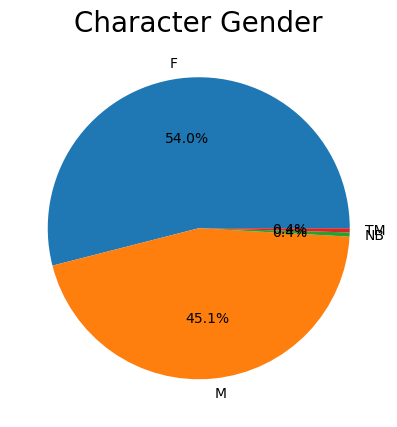

In [35]:
plt.figure(figsize=(5,5),dpi=100)
plt.pie(x=[grp_by_sex['F'],grp_by_sex['M'],grp_by_sex['NB'],grp_by_sex['TM']],labels=['F','M','NB','TM'],autopct='%.1f%%')
plt.title('Character Gender',fontsize=20)
plt.show()

### Actors's age group

In [36]:
char['age'].value_counts()

27    22
25    21
23    15
24    15
26    14
28    12
35    12
29    11
30    11
22    11
34     9
20     8
39     7
36     7
31     6
40     6
32     6
18     6
19     6
21     5
33     4
37     2
42     2
44     1
46     1
43     1
13     1
41     1
14     1
17     1
48     1
Name: age, dtype: int64

In [37]:
char.loc[(char['age'] <= 20),"ageGroup"] = 'U20'
char.loc[(char['age'] > 20) & (char['age'] <=30),"ageGroup"] = 'U30'
char.loc[(char['age'] > 30) & (char['age'] <=40),"ageGroup"] = 'U40'
char.loc[(char['age'] > 40) & (char['age'] <=50),"ageGroup"] = 'U50'
char.head()

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
D:\Anaconda\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
D:\Anaconda\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

,index,name,birthday,title,characterName,characterAge,characterGender,loveInterest,age,ageGroup
0,0,Ben Platt,1993-09-24,The Politician,Payton Hobart,17.0,M,"Alice Charles, Astrid Sloan, River Barkley\r",28,U30
1,1,Zoey Deutch,1994-11-10,The Politician,Infinity Jackson,17.0,F,,27,U30
2,2,Lucy Boynton,1994-01-17,The Politician,Astrid Sloan,17.0,F,"Payton Hobart, River Barkley\r",28,U30
3,3,Julia Schlaepfer,1995-03-03,The Politician,Alice Charles,17.0,F,"Payton Hobart, James Sullivan\r",26,U30
4,4,Laura Dreyfuss,1988-08-22,The Politician,McAfee Westbrook,17.0,F,Skye Leighton,33,U40


In [38]:
age_grp = char['ageGroup'].value_counts()
age_grp

U30    137
U40     59
U20     23
U50      7
Name: ageGroup, dtype: int64

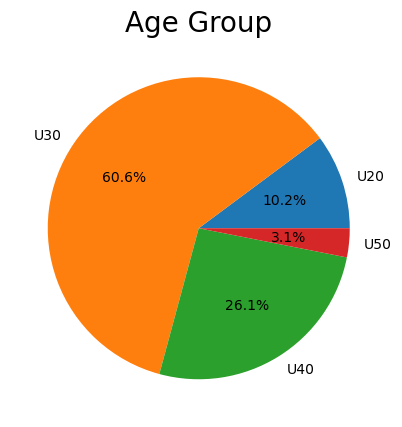

In [39]:
plt.figure(figsize=(5,5),dpi=100)
plt.pie(x=[age_grp['U20'],age_grp['U30'],age_grp['U40'],age_grp['U50']],labels=['U20','U30','U40','U50'],autopct='%.1f%%')
plt.title('Age Group',fontsize=20)
plt.show()

### Correlation

In [40]:
char.corr()

,index,characterAge,age
index,1.000000,0.067046,-0.065497
characterAge,0.067046,1.000000,0.188706
age,-0.065497,0.188706,1.000000


<AxesSubplot:>

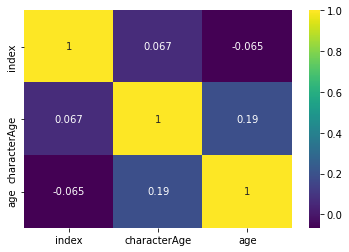

In [42]:
sns.heatmap(char.corr(),annot=True,cmap='viridis')